# Contents

Contents of the Assignment

 The main idea of the Assigment was, to determine how many are talking about the NFL Teams Seahawks and Cowboys, after the match

1) Registered for Twitter Streaming API

2) Used streaming api to get tweets for two days, first day data is used to train bloom filter and second day data to check the matched words from previous day.

3) Tweets are based on key words : 'Seahwaks', 'Cowboys','NFL' and the location is seattle or oklahoma, the tweet language is english.

4) Streamed the data for first day(Nov-2).The size of the file(twitter_nfldata_nov2_2.txt) is 40+ MB. Took only the tweet data from the file, removed urls and stop words.The filtered data is used to train the bloom filter.The processing is same for second day(Nov-3) with file(twitter_nfldata_nov3_1.txt) size is 40+ MB. The filtered data is passed to bloom filter to check the matched words.

5) A histogram is plotted to showcase the frequency of few of the macthed words from both the days(EX: NFL is matched word, then its frequency in two days.)



In [18]:
import pip    
def install(package):
   pip.main(['install', package])


#install('pybloom')
#install('tweepy')

You are using pip version 7.0.3, however version 7.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


  Running setup.py install for oauthlib


In [200]:
# the python program used to stream twitter data for both the days
!cat nfl_twitter_stream_nov2.py


#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#Variables that contains the user credentials to access Twitter API 
access_token = "199360570-yFGLbq8f51Fg9dUrq7S9vG8tfAYGS632DTl33NMJ"
access_token_secret = "rU1RZ0baNJ0S5j9Q5EUFuYcjNwOS5BWPSqRkPDsqQsMft"
consumer_key = "8GIn28ONAvpbmF5Y27ogmom7T"
consumer_secret = "MXdAlt5XBE6WaujmI2SF1Kzex7RSXJmaI5W1yOe8ucnfbbO7HR"


#This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):

    def on_data(self, data):
        print data
        return True

    def on_error(self, status):
        print status


if __name__ == '__main__':

    try:
        #This handles Twitter authetification and the connection to Twitter Streaming API
        l = StdOutListener()
        auth = OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_token, access_token_secret)
        st

In [201]:
# First day tweets
# !python nfl_twitter_stream_nov2.py > twitter_nfldata_nov2_2.txt

In [ ]:
# Second day tweets
# !python nfl_twitter_stream_nov2.py > twitter_nfldata_nov3_1.txt

In [6]:
# Remove Urls from the tweets
import re
import json
import pandas as pd
tweets_data_path = 'twitter_nfldata_nov2_2.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        


tweets_text=[]
tweets_text= map(lambda tweet: tweet['text'], tweets_data)

#print tweets_text[5]

tweets_no_url=[]
tweets_no_url=map(lambda tweet: re.sub(r"http\S+", "", tweet), tweets_text)


In [7]:
#Remove stop words

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stopset = set(stopwords.words('english'))

filtered_tweets=[]
for line in tweets_no_url:
    tokens=word_tokenize(line)
    tokens = [w for w in tokens if not w in stopset]
    filtered_tweets.extend(tokens)


In [8]:
# Train bloom filter with filtered tweets
from pybloom import BloomFilter

bf = BloomFilter(10000000, 0.01,)

counter=0
for word in filtered_tweets:
    counter=counter+1
    bf.add(word.rstrip())
        



In [9]:
# the similar procedure for processing second day tweet data

import json
import pandas as pd
import re 
tweets_data_path_day2 = 'twitter_nfldata_nov3_1.txt'


tweets_data_day2 = []
tweets_file_day2 = open(tweets_data_path_day2, "r")
for line in tweets_file_day2:
    try:
        tweet_day2 = json.loads(line)
        tweets_data_day2.append(tweet_day2)
    except:
        continue
        


tweets_text_day2=[]
tweets_text_day2= map(lambda tweet: tweet['text'], tweets_data_day2)



tweets_no_url_day2=[]
tweets_no_url_day2=map(lambda tweet: re.sub(r"http\S+", "", tweet), tweets_text_day2)


In [10]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stopset2 = set(stopwords.words('english'))

filtered_tweets_day2=[]
for line in tweets_no_url_day2:
    tokens=word_tokenize(line)
    tokens = [w for w in tokens if not w in stopset2]
    filtered_tweets_day2.extend(tokens)


#print filtered_tweets_day2


In [11]:
# Total words that are matched

counter=0
matched_words=[]

for word in filtered_tweets_day2:
    if word in bf:
        if word not in matched_words:
            matched_words.append(word)
print len(matched_words)
print matched_words

6006
[u'Raiders', u'wide', u'receiver', u'right', u'#', u'NFL', u'RT', u'@', u'SportsCenter', u':', u'And', u'four', u'.', u'With', u'Panthers', u"'", u'win', u'Monday', u',', u'teams', u'7-0', u'first', u'time', u'history', u'Brees', u'Dalton', u'Wilson', u'Kuechly', u'VOTE', u'Week', u'yet', u'another', u'chance', u"'s", u'make', u'break', u'Eagles', u'They', u'keep', u'getting', u'chances', u'eagles', u'Packers', u'Bowl', u'!', u'GreenBayPackers', u'NFLUK', u'UK', u'Fans', u'What', u'think', u'games', u'played', u'across', u'?', u'Where', u'Fan', u'contest', u'Won', u'$', u'25', u'week', u'...', u'Seahawks', u'UPDATE', u'Ricardo', u'Lockette', u'successful', u'neck', u'surgery', u'afternoon', u'LOB', u'host', u'chat', u'years', u'working', u'Great', u'Midseason', u'Sour', u'Rankings', u'The', u'best', u'worst', u'NFL\u2019s', u'8', u'Players', u'Live', u'By', u'-', u'Rams', u'tell', u'city', u'fix', u'stadium', u'next', u'home', u'game', u'tired', u'AdamSchefter', u'pressure', u'alw

In [12]:
# Frequency of matched words

from collections import Counter
import numpy as np
day_1=Counter(filtered_tweets)
day_2=Counter(filtered_tweets_day2)
for word in matched_words:
    print 'day 1 count : ',word , " - ",day_1.get(word)
    print 'day 2 count : ',word , " - ",day_2.get(word)
#print day_1.get('Falcons')
#print day_2.get('Falcons')

#len(np.unique(filtered_tweets_day2))
#print len(matched_words)

day 1 count :  Raiders  -  108
day 2 count :  Raiders  -  121
day 1 count :  wide  -  84
day 2 count :  wide  -  13
day 1 count :  receiver  -  80
day 2 count :  receiver  -  14
day 1 count :  right  -  92
day 2 count :  right  -  86
day 1 count :  #  -  7307
day 2 count :  #  -  8508
day 1 count :  NFL  -  5067
day 2 count :  NFL  -  6737
day 1 count :  RT  -  3823
day 2 count :  RT  -  3928
day 1 count :  @  -  8581
day 2 count :  @  -  8901
day 1 count :  SportsCenter  -  103
day 2 count :  SportsCenter  -  404
day 1 count :  :  -  6008
day 2 count :  :  -  7096
day 1 count :  And  -  60
day 2 count :  And  -  421
day 1 count :  four  -  7
day 2 count :  four  -  445
day 1 count :  .  -  4120
day 2 count :  .  -  5816
day 1 count :  With  -  97
day 2 count :  With  -  235
day 1 count :  Panthers  -  69
day 2 count :  Panthers  -  473
day 1 count :  '  -  494
day 2 count :  '  -  384
day 1 count :  win  -  176
day 2 count :  win  -  320
day 1 count :  Monday  -  63
day 2 count :  Mon

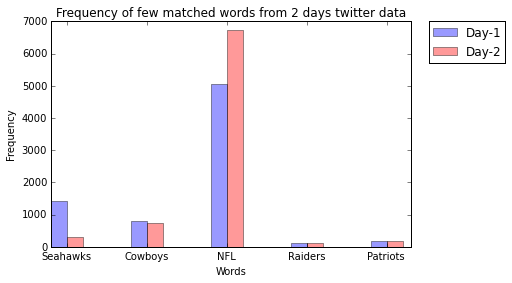

In [13]:
# Histogram that show the frequency of some most popular words
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

day_1=Counter(filtered_tweets)
day_2=Counter(filtered_tweets_day2)

tweets_day_1 = (day_1.get('Seahawks'),day_1.get('Cowboys'),day_1.get('NFL'),day_1.get('Raiders'),day_1.get('Patriots'))
tweets_day_2=(day_2.get('Seahawks'),day_2.get('Cowboys'),day_2.get('NFL'),day_2.get('Raiders'),day_1.get('Patriots'))

words=5
fig, ax = plt.subplots()

index = np.arange(words)
bar_width = 0.20
opacity = 0.4
error_config = {'ecolor': '0.3'}
rects1 = plt.bar(index, tweets_day_1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Day-1')

rects2 = plt.bar(index+bar_width, tweets_day_2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Day-2')

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of few matched words from 2 days twitter data')
plt.xticks(index + bar_width, ('Seahawks','Cowboys','NFL','Raiders','Patriots'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()